# Upper Confidence Bound Algorithm

Importer les librairies numpy, matplotlib.pyplot, pandas, math

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math


Importer le fichier 'Ads_CTR_Optimisation.csv'
Afficher les 10 premieres lignes pour voir les donnees

In [ ]:
simulation_data = pd.read_csv('Ads_CTR_Optimisation.csv')
simulation_data.head(10)


 Initialisez les variables necessaires : 
 N (nombre d'iterations egale le nombre de lignes dans le dataset), 
 number_ads (nombre de publicites a afficher = nombre de colonnes)

In [ ]:
N = 10000
number_ads = 10

Initialisez les 4 tableaux d'entiers pour stocker les resultats d'affichage (nombre d'affichage pour chaque publicite, nombre de clicks pour chaque publicite, le taux de clicks pour chaque publicite, le ucb pour chaque publicite)
Toutes les valeurs initialisez a zero, sauf delta qui devrait etre initialisee a 1e400 .

In [ ]:
number_of_display = [0] * number_ads
number_of_clicks = [0] * number_ads
taux_de_click = [0] * number_ads
ucb = [1e400] * number_ads

On initialise une liste pour sauvegarder l'historique des actions 

In [175]:
display_history = []

Definissez une fonction qui calcule le taux de click pour chaque publicite. 
Il faut diviser le nombre de fois ou publicite a ete clickee par le nombre de fois qu'elle a ete affichee. Attention a la division par zero !!!

In [176]:
def calcul_taux_de_click (ad_index):
    if number_of_display[ad_index] > 0 :
        return  number_of_clicks[ad_index] / number_of_display[ad_index]
    else :
        return (0)

Definissez une fonction qui verifie si la publicite affichee a ete clike ou pas. Elle va  chercher dans le dataset la valeur 0 ou 1 suivant le numero d'internaute et le numero de la publicite affichee. Vous pouvez utiliser une methode values(raw. column) de l'objet dataset.

In [177]:
def get_result_from_file(raw, column):
    return simulation_data.values[raw, column]

Definissez une fonction qui calcule l'intervalle de confiance (DELTA). La formule magique est dans le cours, mais c'est aussi une racine carree du :
    logarithme de N divise par le nombre de fois que la publicite a ete affichee. 
    coeficient 3/2
Attention a la division par zero et au log de zero !!!
Vous pouvez ajouter + 1 par exemple


In [196]:
def calcul_delta (n, ad_index): 
        return math.sqrt(3/2 * math.log(n + 1) / (number_of_display[ad_index] + 1 ))

La derniere fonction : calculer le UCB pour une publicite donnee. Ceci est vraiment simple. C'est la valeur maximale de taux de clicks qu'on peut avoir, tenant compte de l'interval de confiance.

In [197]:
def calcul_UCB (n, ad_index): 
    delta = calcul_delta(n, ad_index)
    return taux_de_click[ad_index] + delta
        

Ecrivez le corps de l'algorithme, tel que vu en cours.
A la fin de chaque iteration ajoutez le code suivant
    if iteration % 1000 == 0 :
        display_history.append(number_of_display.copy())
Ceci va permettre d'enregistrer l'historique de modification de comportement de l'algorithme tous les 1000 iterations.

In [192]:
# pour chaque iteration je cherche la meilleure publicite a afficher
for n in range(0, N):
    best_ad = 0
    best_UCB = 0.0

    # pour chaque publicite (action possible) je compare le ucb, et je garde index du meilleur ucb
    for i in range(0, number_ads):
        
        # mettre a jour le meuilleur ucb et trouver la meuilleure publicite a afficher
        if ucb[i] > best_UCB:
            best_UCB = ucb[i]
            best_ad = i
    
    # afficher la publicite
    
    # verifier le resultat d'affichage dans le fichier de simulation
    display_result = get_result_from_file(n, best_ad)
    
    # mettre a jour le tableau d'affichages
    number_of_display[best_ad] = number_of_display[best_ad] + 1
    
    # mettre a jour le tableau de clicks
    number_of_clicks[best_ad] = number_of_clicks[best_ad] + display_result
    
    # mettre a jour le tableau avec les taux de clicks
        taux_de_click[i] = calcul_taux_de_click(i)
        
    # mettre a jour le UCB pour chaque publicite
    ucb[i] = calcul_UCB(n, i) 
        
    # ici memoriser historique des choix de l'algorithme apres chaque 1000 iterations
    if n % 1000 == 0 :
        print("appending ", number_of_display)
        display_history.append(number_of_display.copy())

appending  [10001, 0, 0, 0, 0, 0, 0, 0, 0, 0]
appending  [10001, 103, 85, 103, 259, 52, 81, 153, 99, 65]
appending  [10001, 159, 115, 151, 914, 71, 111, 254, 135, 90]
appending  [10001, 197, 163, 197, 1496, 88, 146, 438, 167, 108]
appending  [10001, 288, 179, 248, 2129, 99, 222, 526, 188, 121]
appending  [10001, 308, 197, 263, 2999, 106, 232, 566, 201, 128]
appending  [10001, 363, 212, 286, 3627, 117, 268, 745, 241, 141]
appending  [10001, 403, 232, 333, 4340, 125, 298, 841, 279, 149]
appending  [10001, 428, 250, 366, 5095, 131, 321, 966, 288, 155]
appending  [10001, 455, 262, 375, 5980, 136, 334, 996, 301, 161]


# Visualisations

Felicitations ! Maintenant vous pouvez visualiser les resultats

In [100]:
number_of_display

[695, 353, 204, 339, 6527, 140, 381, 937, 231, 193]

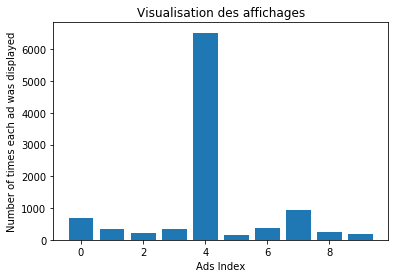

In [101]:
plt.bar(range(10), number_of_display)
plt.title('Visualisation des affichages')
plt.xlabel('Ads Index')
plt.ylabel('Number of times each ad was displayed')
plt.show()

In [102]:
number_of_clicks

[120, 41, 11, 38, 1758, 0, 47, 180, 16, 9]

In [103]:
total_clicks = sum(number_of_clicks)
total_clicks

2220

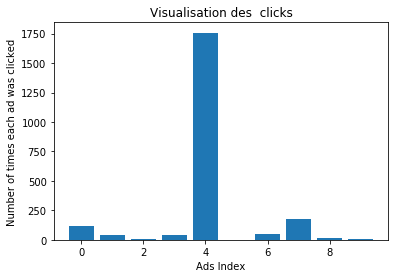

In [104]:
plt.bar(range(10), number_of_clicks)
plt.title('Visualisation des  clicks')
plt.xlabel('Ads Index')
plt.ylabel('Number of times each ad was clicked')
plt.show()

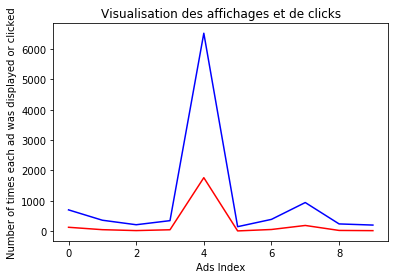

In [105]:
plt.plot(number_of_display, color="blue")
plt.plot(number_of_clicks, color="red")
plt.title('Visualisation des affichages et de clicks')
plt.xlabel('Ads Index')
plt.ylabel('Number of times each ad was displayed or clicked')
plt.show()

In [106]:
total_clicks

2220

In [107]:
display_history

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [96, 87, 66, 93, 236, 46, 69, 181, 69, 58],
 [207, 130, 99, 152, 693, 71, 128, 310, 112, 99],
 [327, 206, 126, 193, 1084, 91, 180, 532, 136, 126],
 [395, 237, 140, 241, 1704, 103, 237, 634, 165, 145],
 [420, 248, 161, 248, 2513, 108, 265, 711, 171, 156],
 [478, 275, 174, 266, 3269, 119, 293, 773, 185, 169],
 [565, 287, 189, 319, 3977, 127, 309, 836, 214, 178],
 [669, 300, 196, 328, 4773, 133, 319, 876, 222, 185],
 [680, 307, 201, 335, 5668, 137, 340, 916, 227, 190]]

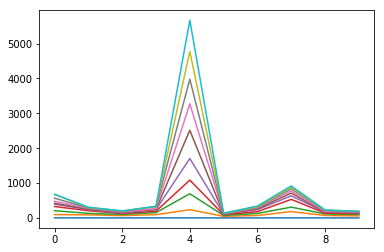

In [109]:
for i in range (0,10):
    plt.plot(display_history[i])

# Random sampling

Maintenant vous pouvez faire la meme chose en choisissant une action au hasard random(0,9) 
et comparer les resultats.
Ce qui'il faut surtout comparer c'est le nombre total de clicks dans les deux cas.